In [111]:
import pandas as pd
import numpy as  np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

Uber_rd= pd.read_csv("Uber Request Data.csv")
Uber_rd.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [112]:
#details of Uber_rd data frame
print(Uber_rd.info())
print('\n')
print(Uber_rd.describe())
print('\n')
print(Uber_rd.shape)
print('\n')
print(Uber_rd.columns)
#column-wise null percentages here
print(round(100*(Uber_rd.isnull().sum()/len(Uber_rd.index)),2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


(6745, 6)


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop 

In [113]:
#Cleaning starts 

##Changing to datetime formats

Uber_rd['Request timestamp']=pd.to_datetime(Uber_rd['Request timestamp'])
Uber_rd['Drop timestamp']=pd.to_datetime(Uber_rd['Drop timestamp'])

print(Uber_rd.head())
print('\n')

   Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-11-07 13:00:00  
1 2016-11-07 18:47:00  
2 2016-12-07 09:58:00  
3 2016-12-07 22:03:00  
4 2016-07-13 09:25:47  




In [114]:
## Putting default values 
#Checking if there is a driver id available for the unavailable cars 
Uber_rd.loc[(Uber_rd['Driver id'].isnull()) &(Uber_rd['Status']!='No Cars Available'),:]


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [115]:
#Since Driver is null only for cancelled we can use default value as 0 
Uber_rd.loc[Uber_rd['Driver id'].isnull() &(Uber_rd['Status']=='No Cars Available'),['Driver id']]=0


In [116]:

#column-wise null percentages here
print(round(100*(Uber_rd.isnull().sum()/len(Uber_rd.index)),2))

Request id            0.00
Pickup point          0.00
Driver id             0.00
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64


In [117]:
#Since drop time is null only for cancelled trips assiged them with low end date
Uber_rd.loc[pd.isnull(Uber_rd['Drop timestamp']) ,['Drop timestamp']] = '1900-12-31 00:00:00'
Uber_rd['Drop timestamp']=pd.to_datetime(Uber_rd['Drop timestamp'])

#Extracting date and time  and hour in separate columns for easier analysis
Uber_rd['Rq_Date']=Uber_rd['Request timestamp'].dt.date  
Uber_rd['Dp_Date']=Uber_rd['Drop timestamp'].dt.date

Uber_rd['Rq_Time'] = [datetime.datetime.time(d) for d in Uber_rd['Request timestamp']]
Uber_rd['Dp_Time'] = [datetime.datetime.time(d) for d in Uber_rd['Drop timestamp']]

Uber_rd['Rq_Hour'] = Uber_rd['Request timestamp'].dt.hour
Uber_rd['Dp_Hour'] = Uber_rd['Drop timestamp'].dt.hour

#addition of attributes 
Uber_rd['Supply']= ((Uber_rd['Status']=="Trip Completed"))
Uber_rd['Demand']=1.0
Uber_rd['Supply'].replace(False, 0, inplace=True)
Uber_rd['Supply'].replace(True, 1, inplace=True)


In [118]:
print(round(100*(Uber_rd.isnull().sum()/len(Uber_rd.index)),2))
Uber_rd
##Cleaning Complete and addition of attributes as well 

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
Drop timestamp       0.0
Rq_Date              0.0
Dp_Date              0.0
Rq_Time              0.0
Dp_Time              0.0
Rq_Hour              0.0
Dp_Hour              0.0
Supply               0.0
Demand               0.0
dtype: float64


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Rq_Date,Dp_Date,Rq_Time,Dp_Time,Rq_Hour,Dp_Hour,Supply,Demand
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,2016-11-07,11:51:00,13:00:00,11,13,1.0,1.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,2016-11-07,17:57:00,18:47:00,17,18,1.0,1.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,2016-12-07,09:17:00,09:58:00,9,9,1.0,1.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,2016-12-07,21:08:00,22:03:00,21,22,1.0,1.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,08:33:16,09:25:47,8,9,1.0,1.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,2016-07-13,21:57:28,22:28:59,21,22,1.0,1.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,2016-07-14,06:15:32,07:13:15,6,7,1.0,1.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,2016-07-15,05:11:52,06:07:52,5,6,1.0,1.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,2016-07-15,17:57:27,18:50:51,17,18,1.0,1.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,2016-11-07,06:46:00,07:25:00,6,7,1.0,1.0


Text(0.5,1,'Trip status count')

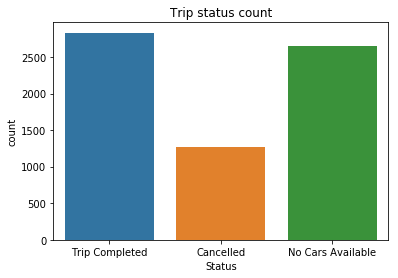

In [119]:
#Plotting starts 
#PLot for univariate analysis of counts of the trip status 
sns.countplot(x='Status', data=Uber_rd)
plt.title("Trip status count")

Text(0.5,1,'No of requests per hour')

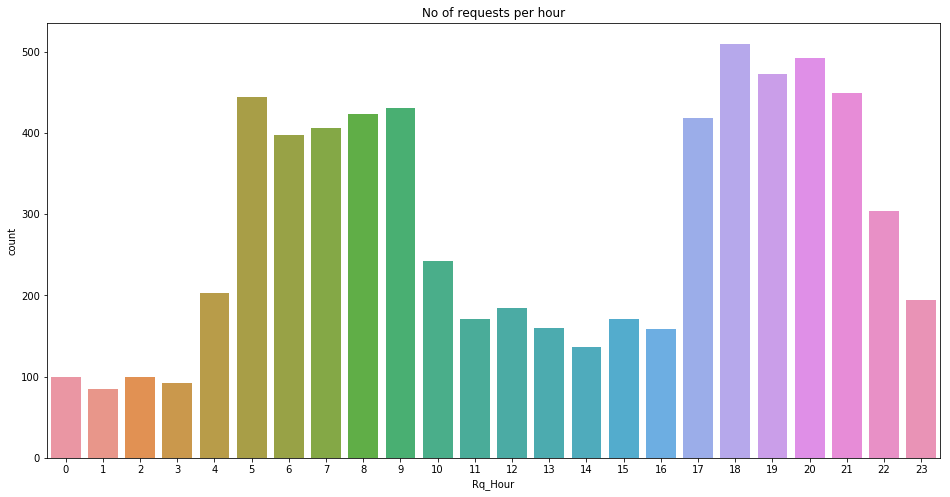

In [120]:
#No of requests per hour
plt.figure(figsize=(16,8))
ax=sns.countplot(x='Rq_Hour', data=Uber_rd)
ax.set_title('No of requests per hour')

Text(0.5,1,'No of requests per hour Status wise')

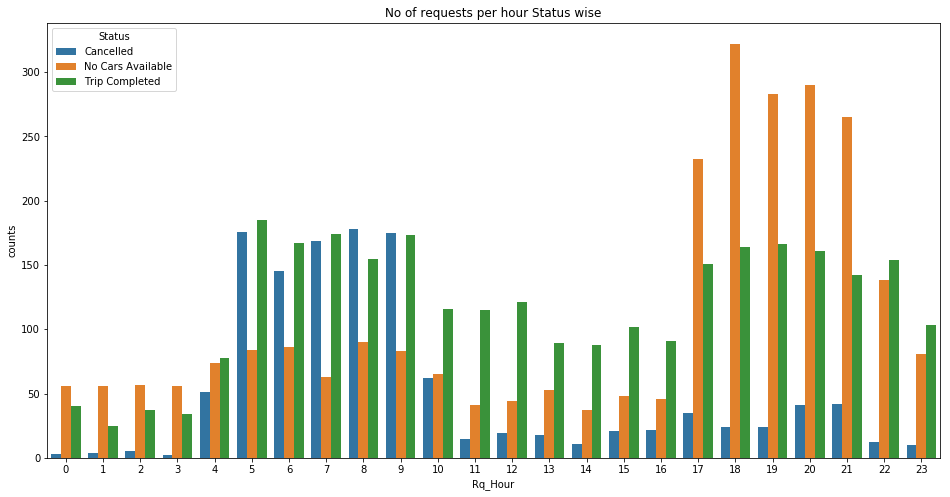

In [121]:
#No of requests per hour Status wise
plt.figure(figsize=(16,8))
Value=Uber_rd.groupby(['Rq_Hour','Status']).size().reset_index(name='counts')
#Value
ax=sns.barplot(x="Rq_Hour", y="counts", hue="Status",data=Value)
ax.set_title('No of requests per hour Status wise')

Text(0.5,1,'Request hour count per pickup point ')

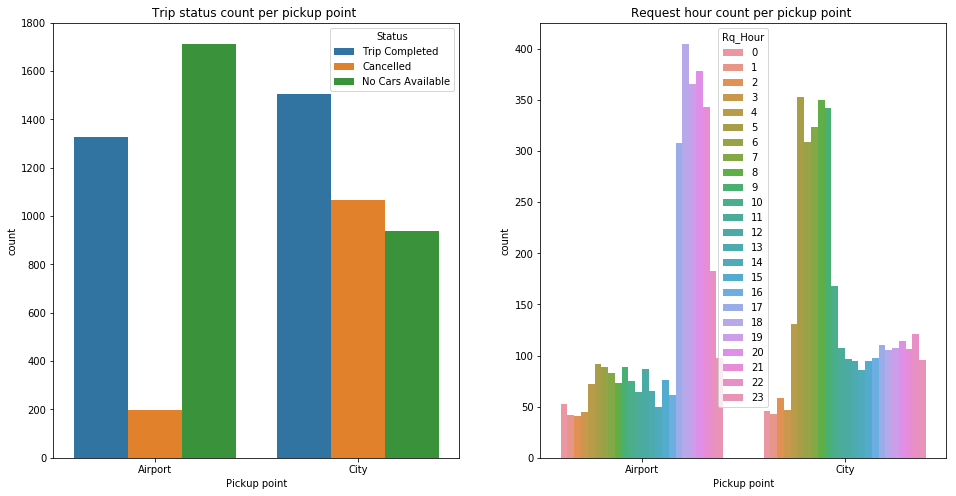

In [122]:
#Trip status count and Request hour count
plt.figure(figsize=(16,8))
Value_rq=Uber_rd.groupby(['Rq_Hour','Status','Pickup point']).size().reset_index(name='counts')
Value_rq.reset_index(inplace=True)

plt.subplot(1, 2, 1)
sns.countplot(x='Pickup point', hue='Status',data=Uber_rd)
plt.title("Trip status count per pickup point ")

plt.subplot(1, 2, 2)
sns.countplot(x='Pickup point', hue='Rq_Hour',data=Uber_rd)
plt.title("Request hour count per pickup point ")


Text(0.5,1,'No of requests per hour wrt Pickup Point ')

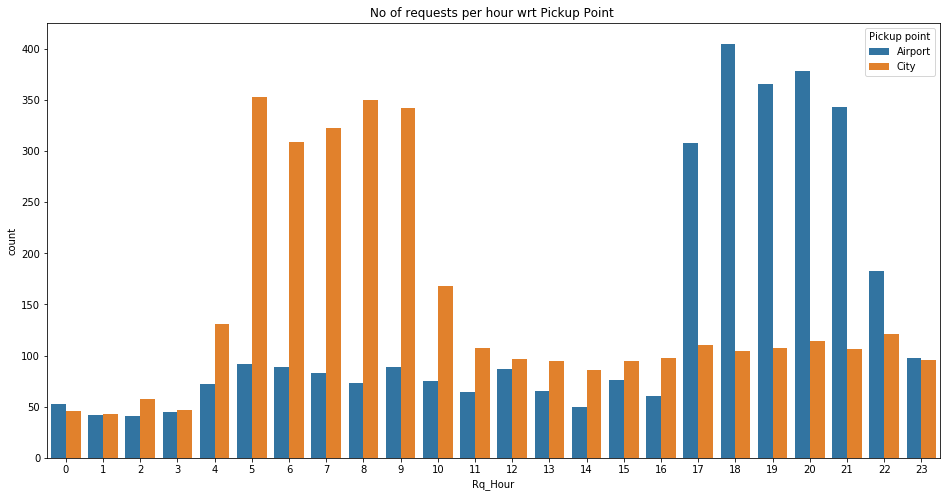

In [123]:
#No of requests per hour wrt Pickup Point 
plt.figure(figsize=(16,8))
ax=sns.countplot(x='Rq_Hour', hue='Pickup point',data=Uber_rd)
ax.set_title('No of requests per hour wrt Pickup Point ')

Text(0.5,1,'Supply/Demand per counts ')

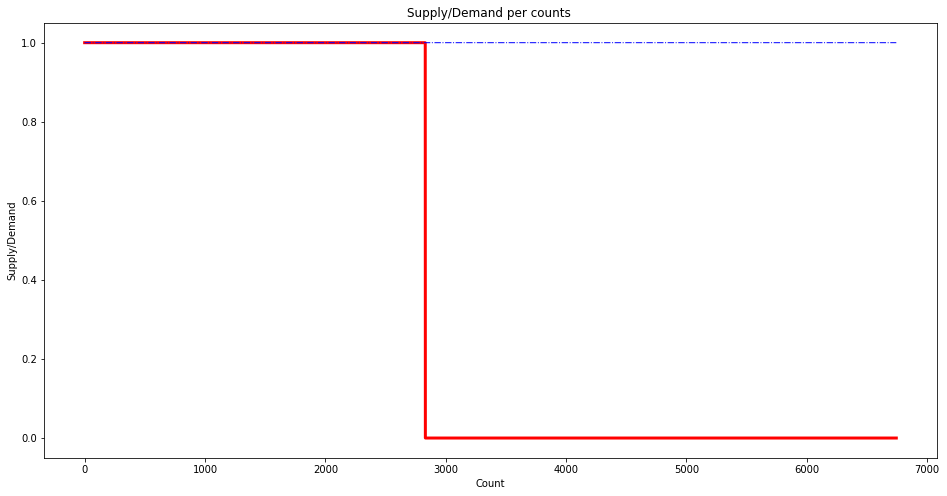

In [124]:
#Supply Demand Graph
plt.figure(figsize=(16,8))
plt.plot(Uber_rd['Supply'],  'r-', linewidth=3)
plt.plot(Uber_rd['Demand'], 'b-.', linewidth=1)
plt.xlabel("Count")
plt.ylabel("Supply/Demand")
plt.title('Supply/Demand per counts ')

Text(0,0.5,'Supply/Demand')

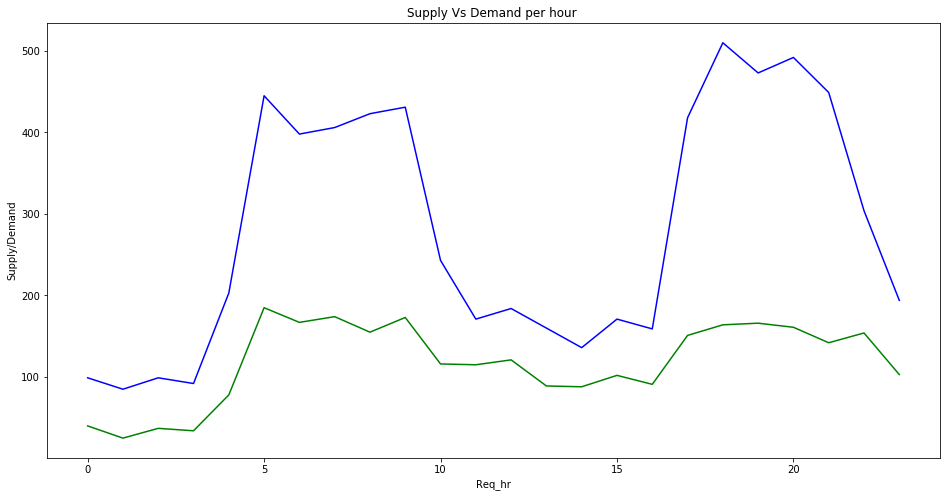

In [125]:
#Supply Demand Graph per hour
Vlu=Uber_rd.groupby(['Rq_Hour']).sum()
Vlu.reset_index(inplace=True)
plt.figure(figsize=(16,8))
plt.plot(Vlu['Supply'] , 'g-', linewidth=1.5)
plt.plot(Vlu['Demand'] , 'b-', linewidth=1.5)
plt.title('Supply Vs Demand per hour ')
plt.xlabel("Req_hr")
plt.ylabel("Supply/Demand")


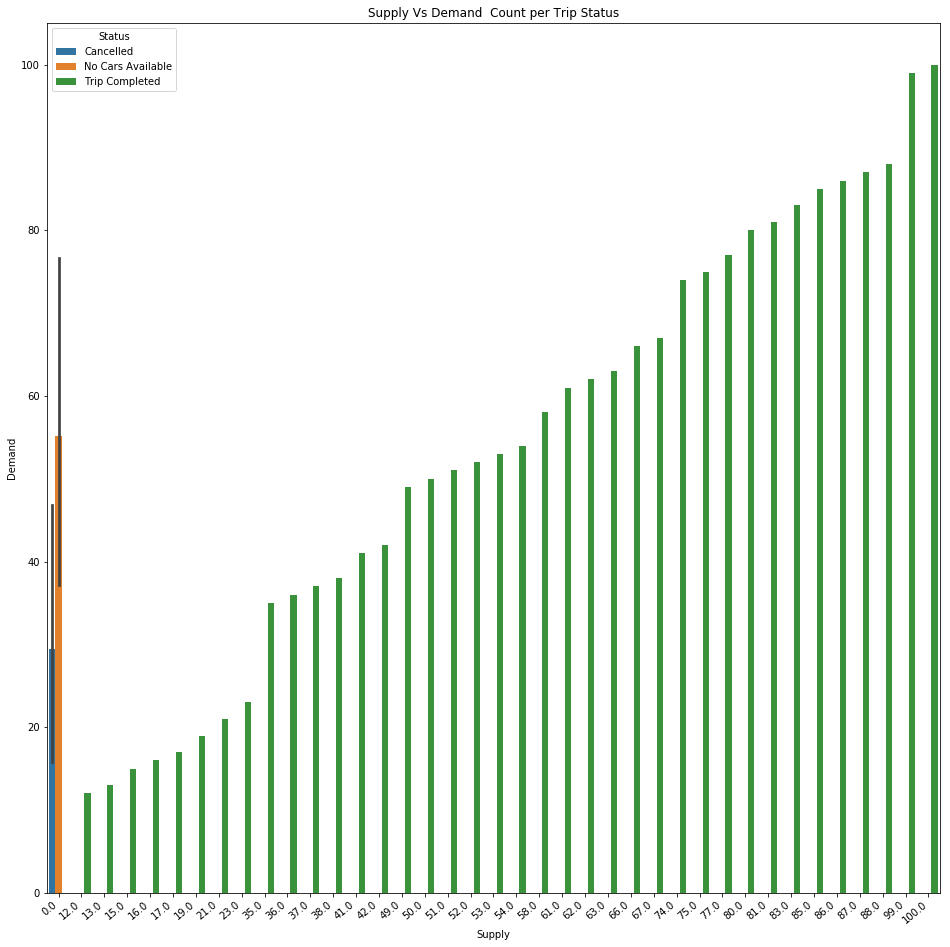

In [126]:
#Supply Vs Demand  Count per Trip Status
Vku=Uber_rd.groupby(['Rq_Hour','Status','Pickup point']).sum()
Vku.reset_index(inplace=True)
plt.figure(figsize=(16,16))
ax = sns.barplot(x="Supply", y="Demand", hue="Status",data=Vku)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Supply Vs Demand  Count per Trip Status')
plt.show()


Text(0.5,1,'Supply Vs Status per Pickup Point')

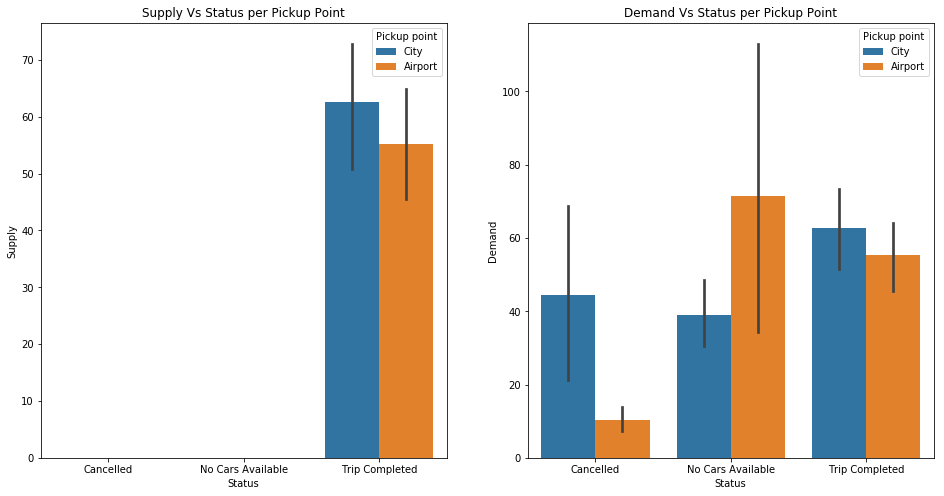

In [127]:
#Demand/Supply Vs Status per Pickup Point
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
p1=sns.barplot(x="Status", y="Supply", hue="Pickup point",data=Vku)
plt.subplot(1, 2, 2)
p2=sns.barplot(x="Status", y="Demand", hue="Pickup point",data=Vku)
p2.set_title('Demand Vs Status per Pickup Point')
p1.set_title('Supply Vs Status per Pickup Point')